 # Проект № 2: Исследование надёжности заёмщиков

## Описание проекта
Кредитный отдел банка предоставил нам датасет со статистикой о платёжеспособности клиентов. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Результаты исследования будут учтены при построении **модели кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

## Обзор данных

### Обзор и изучение общей информации о данных

In [1]:
# импортируем необходимые для работы библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# прочитаем таблицу и сохраним её в переменную data
data = pd.read_csv('data.csv')

# выведем первые 10 строк датасета
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
# посмотрим общие сведения о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
# посмотрим описательную статистику
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [4]:
# посмотрим долю пропущенных значений среди всех данных
data.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

### Вывод

В таблице находятся 21525 строк и 12 столбцов.

При первом визуальном осмотре общих данных таблицы мы видим, что есть пропущенные значения в столбцах `days_employed` и `total_income`. Интересно, что количество пропусков одинаковое. Постараемся в следующих шагах выяснить, имеет ли место быть какая-нибудь закономерность, а так же какими данными лучше заполнить пропуски. Вполне возможно, что произошёл технический сбой и от данных можно избавиться, чтобы не испортить результат анализа предоставленной таблицы.

В значениях `days_employed` есть выбросы в данных - аномально большой стаж работы и отрицательные значения. Аномально большие значения могут быть связаны с тем, что вместо дней указаны часы. В столбце `education` присутствуют строки с различным регистром написания. Помимо этого, в данных могут присутствовать аномалии или артефакты, которые не видны при первичном ознакомлении. Необходимо проверить данные во всех столбцах и строках и подготовить их для дальнейшей работы.

Названия столбов переименовывать не требуется. Их названия хорошо отражают смысл, они записаны в нижнем регистре, составные слова представлены в стиле `snake_case`.

## Предобработка данных

### Заполнение пропусков

В столбцах `days_employed` и `total_income` были выявлены пропущенные значения. Проверим их долю в данных столбцах, чтобы выяснить, следует ли их удалить, либо оставить и заполнить ячейки медианными значениями.

In [5]:
# подсчитаем количество строк без указания рабочего стажа
data[data['days_employed'].isna()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

In [6]:
# подсчитаем количество строк без указания ежемесячного дохода
data[data['total_income'].isna()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

In [7]:
# проверим какую долю составляют пропущенные значения в столбце data_employed
f"{data['days_employed'].isna().sum() / len(data):.1%}"

'10.1%'

In [8]:
# проверим какую долю составляют пропущенные значения в столбце total_income
f"{data['total_income'].isna().sum() / len(data):.1%}"

'10.1%'

In [9]:
# так как пропущенные значения в столбцах с доходом и стажем одинаков - посмотрим, есть ли какая-нибудь закономерность
data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Мы вывели 10 первых строчек с условием, чтобы все пропущенные значения одновременно присутствовали в обоих столбцах `total_income` и `days_employed`. 

По столбцу `dob_years` видно, что возраст варьируется от 21 до 65. Предположение о том, что это никогда неработавшие люди не является верным (например, студенты или девушки, которые ушли в декретный отпуск не начав карьеру). 

Во всех остальных столбцах также не прослеживается никакой закономерности. Здесь и пенсионеры, и госслужащие: у всех разные цели для получения кредита, разный уровень образования. 

По условию задания необходимо разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок, следовательно, можно заменить пропуски на медианные значения, чтобы не потерять информацию из тех столбцов, которые пригодятся в дальнейшем исследовании. 

In [10]:
print('Минимальный ежемесячный доход:', data['total_income'].min())
print('Максимальный ежемесячный доход:', data['total_income'].max())

Минимальный ежемесячный доход: 20667.26379327158
Максимальный ежемесячный доход: 2265604.028722744


По уровню ежемесячного дохода никаких аномалий не наблюдается.

In [11]:
# переведём все отрицательные значения в положительные по модулю
data['days_employed'] = abs(data['days_employed'])

In [12]:
# найдём среднее значение и медиану дохода и стажа 
total_income_median = data['total_income'].median()
days_employed_median = data['days_employed'].median()

# заменим пропущенные значения на медианные
data['total_income'] = data['total_income'].fillna(total_income_median)
data['days_employed'] = data['days_employed'].fillna(days_employed_median)

In [13]:
# проверим данные на наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


#### Вывод

Выявлено, что пропущенные значения составляют 10.1% от общего числа значений в столбцах `days_employed` и `total_income`. 

Пропущенные значения могли появиться по нескольким причинам. Например, человек не захотел указывать данные по каким-либо причинам: человек не работает и соответственно не имеет рабочего стажа (например, студенты); человек работает неофициально и не показывает свой официальный заработок. Вполне возможны и технические сбои при сборе данных. Пропущено одинаковое количество строк, но никакой закономерности в этом выявлено не было. Следовательно, точно сказать о природе пропущенных значений не представляется возможным. 

При удалении строк с пропущенными значениями мы бы потеряем значительную часть ценных данных. Точные причины возникновения пропусков мы не знаем, соответственно, в данной ситуации заменили данные на медианные - они подойдут лучше, чем средние или нулевые.

### Проверка данных на аномалии и исправления

В этом шаге проверим все столбцы таблицы на аномалии.

In [14]:
# проверим по количеству детей в столбце 'children' 
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце с количеством детей присутствуют отрицательные значения. К тому же, часть из них имеет 20 детей, что тоже наводит на мысль об ошибке при сборе данных. Например, иногда при наборе на `Numpad` пальцем можно задеть кнопку `0` при скоростной печати.

In [15]:
# посмотрим, сколько строк имеют такие аномальные значения
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Отрицательные значения переведём в положительные по модулю. Строки с 20 детьми заменим на 2. В целом, всего 76 строк и их изменение не должны исказить результат анализа данных. Предполагаем, что при внесении данных ошибочно был добавлен ноль.

In [16]:
# переведём все отрицательные значения в положительные по модулю
data['children'] = abs(data['children'])

In [17]:
# заменим количество детей на 2 в тех строках, где их значение составляет 20.
data.loc[data['children'] == 20, 'children'] = 2 

In [18]:
# проверим ещё раз уникальные значения в столбце children
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

Отрицательных и аномальных значений в количестве детей теперь нет - столбец пригоден для работы

In [19]:
# проверим данные по минимальному и максимальному рабочему стажу для выявления аномалий
print('Минимальный рабочий стаж:', data['days_employed'].min())
print('Максимальный рабочий стаж:', data['days_employed'].max())

Минимальный рабочий стаж: 24.14163324048118
Максимальный рабочий стаж: 401755.40047533


В этом столбце присутствуют аномально высокие значения. Предположим, что аномально высокие значения указаны в часах, а не в днях. Переведём все данные в количество лет. 

In [20]:
# переведём рабочий стаж из часов в дни
data['days_employed'] = data['days_employed'] / 24

In [21]:
# переведём рабочий стаж из дней в годы
data['days_employed'] = data['days_employed'] / 365

In [22]:
print('Минимальный рабочий стаж:', data['days_employed'].min())
print('Максимальный рабочий стаж:', data['days_employed'].max())

Минимальный рабочий стаж: 0.0027558942055343812
Максимальный рабочий стаж: 45.8624886387363


Теперь данные больше похожи на реальные: максимальный стаж - 45 вместо прежних почти 1000 лет.

In [23]:
# проверим, есть ли такие аномалии, когда стаж больше возраста человека
data[(data['dob_years'] - data['days_employed']) < 0].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,39.559546,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,0.304141,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
157,0,39.773291,38,среднее,1,женат / замужем,0,F,пенсионер,1,113560.650035,сделка с автомобилем
270,3,0.213774,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,45.417416,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
751,0,44.606788,41,среднее,1,женат / замужем,0,M,пенсионер,0,151898.693438,операции со своей недвижимостью
776,0,41.705087,38,среднее,1,женат / замужем,0,F,пенсионер,0,73859.425084,покупка недвижимости
1040,0,0.132195,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
1149,0,0.106696,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости
1175,0,42.337843,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования


In [24]:
# посчитаем, сколько строк с таким несоответствием
# данные несоответствия исправим чуть ниже
data[(data['dob_years'] - data['days_employed']) < 0].count()

children            155
days_employed       155
dob_years           155
education           155
education_id        155
family_status       155
family_status_id    155
gender              155
income_type         155
debt                155
total_income        155
purpose             155
dtype: int64

In [25]:
# проверим данные по возрасту клиентов
print('Минимальный возраст:', data['dob_years'].min())
print('Максимальный возраст:', data['dob_years'].max())

Минимальный возраст: 0
Максимальный возраст: 75


In [26]:
data['dob_years'].value_counts().sort_index()

0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

Похоже, кто-то не указал свой возраст, поэтому имеем нулевые значения. Максимальный возраст не имеет аномалий.

In [27]:
# посмотрим, какой тип занятости имеют клиенты с ошибочным возрастом
data.loc[data['dob_years'] == 0, 'income_type'].value_counts()

сотрудник      55
пенсионер      20
компаньон      20
госслужащий     6
Name: income_type, dtype: int64

In [28]:
# найдём медианы возраста по типам занятости
dob_years_medians = data.groupby('income_type')['dob_years'].median()
dob_years_medians

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [29]:
# заменим значения
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'сотрудник'), 'dob_years'] = dob_years_medians[6]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'пенсионер'), 'dob_years'] = dob_years_medians[4]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'компаньон'), 'dob_years'] = dob_years_medians[3]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'госслужащий'), 'dob_years'] = dob_years_medians[2]

In [30]:
# проверим минимальный возраст теперь
print('Минимальный возраст:', data['dob_years'].min())

Минимальный возраст: 19


In [31]:
# найдём медианное значение трудового стажа для типа занятости
medians_days_employed = data.groupby('income_type')['days_employed'].median()
round(medians_days_employed, 0)

income_type
безработный        42.0
в декрете           0.0
госслужащий         0.0
компаньон           0.0
пенсионер          41.0
предприниматель     0.0
сотрудник           0.0
студент             0.0
Name: days_employed, dtype: float64

In [32]:
# заменим нули медианными значениями
data.loc[(data['days_employed'].isna()) & (data['income_type'] == 'сотрудник'), 'days_employed'] = medians_days_employed[6]
data.loc[(data['days_employed'].isna()) & (data['income_type'] == 'компаньон'), 'days_employed'] = medians_days_employed[3]
data.loc[(data['days_employed'].isna()) & (data['income_type'] == 'пенсионер'), 'days_employed'] = medians_days_employed[4]
data.loc[(data['days_employed'].isna()) & (data['income_type'] == 'госслужащий'), 'days_employed'] = medians_days_employed[2]
data.loc[(data['days_employed'].isna()) & (data['income_type'] == 'предприниматель'), 'days_employed'] = medians_days_employed[5]

In [33]:
# проверим, заменились ли значения по возрасту людей
data['dob_years'].value_counts().sort_index()

19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    648
40    615
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    397
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [34]:
# создадим функцию, которая заменит значения рабочего стажа, превышающие возраст человека
data.loc[(data['days_employed'] >= (data['dob_years'])), 'days_employed'] = days_employed_median

In [35]:
# переведём рабочий стаж из годы в дни
data['days_employed'] = data['days_employed'] * 365

In [36]:
# проверим столбец с образованием
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

 Значения, записанные по-разному: с использованием заглавных и строчных букв будут исправлены в шаге 2.4.

In [37]:
# проверим столбец с индексами образования
data['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

C этим столбцом всё в порядке. 

In [38]:
# проверим столбец с семейным положением
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

C этим столбцом всё в порядке.

In [39]:
# проверим столбец с индексами семейного положения
data['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

C этим столбцом всё в порядке.

In [40]:
# проверим столбец с указанием пола
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Здесь появляется странная аномалия в виде XNA. Хорошо, что встречается всего лишь в одной строке.

In [41]:
# так как это всего одна строка, её удаление не повляет на результаты анализа наших данных
data = data.loc[data['gender'] != 'XNA']

In [42]:
# проверим ещё раз столбец с указанием пола
data['gender'].unique()

array(['F', 'M'], dtype=object)

Теперь остался только мужской и женский пол.

In [43]:
# проверим столбец с указанием типа занятости
data['income_type'].value_counts()

сотрудник          11119
компаньон           5084
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

В столбце аномалий не выявлено.

In [44]:
# проверим столбец с указанием задолженностей
data['debt'].value_counts()

0    19783
1     1741
Name: debt, dtype: int64

В столбце аномалий не выявлено.

#### Вывод

Мы изучили данные и избавились от аномалий - заменили отрицательные значения на положительные, убрали выбросы в виде слишком больших значений рабочего стажа (основной причиной было то, что некоторые данные были указаны в часах, а не днях, в других случаях, возможно, ошибки были вызваны сбоем) и артефакты. Пропущенные значения заменили на медианные в соответствии с типом занятости. 

Продолжим подготовку данных к дальнейшему анализу.

### Изменение типов данных

In [45]:
# заменим вещественный тип данных в столбце с ежемесячным доходом на целочисленный
data['total_income'] = data['total_income'].astype('int')

In [46]:
# заменим вещественный тип данных в столбце с рабочим стажем на целочисленный
data['days_employed'] = data['days_employed'].astype('int')

In [47]:
# заменим вещественный тип данных в столбце возраста клиента на целочисленный
data['dob_years'] = data['dob_years'].astype('int')

In [48]:
# проверим изменился ли тип данных в столбце total_income
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21524 non-null  int64 
 1   days_employed     21524 non-null  int32 
 2   dob_years         21524 non-null  int32 
 3   education         21524 non-null  object
 4   education_id      21524 non-null  int64 
 5   family_status     21524 non-null  object
 6   family_status_id  21524 non-null  int64 
 7   gender            21524 non-null  object
 8   income_type       21524 non-null  object
 9   debt              21524 non-null  int64 
 10  total_income      21524 non-null  int32 
 11  purpose           21524 non-null  object
dtypes: int32(3), int64(4), object(5)
memory usage: 1.9+ MB


### Удаление дубликатов

In [49]:
# в таблице 21525 строк, мы не можем просмотреть все, поэтому переведём в нижний регистр все столбцы содержащие слова
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['income_type'] = data['income_type'].str.lower()
data['purpose'] = data['purpose'].str.lower()

In [50]:
# найдём общую сумму дубликатов в таблице
data.duplicated().sum()

71

In [51]:
# удаляем все дубликаты
data = data.drop_duplicates()

In [52]:
#проверим остались ли дубликаты
data.duplicated().sum()

0

#### Вывод

Для выявления дубликатов мы применили метод `duplicated()` вместе с `sum()`, чтобы подсчитать количество дубликатов в таблице, без применения `sum()` мы можем увидеть все строки таблицы с булевыми значениями, где True это дубликат. Для удаления дубликатов используем `drop_duplicates()`. Основные причины возникновения дубликатов — повторные представления, неправильное соединение данных из разных источников, ошибки пользователя при занесении информации.

Теперь данные полностью очищены, приведены в порядок и подготовлены для работы.

### Лемматизация

In [53]:
# посмотрим для каких целей люди берут кредиты
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      620
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [54]:
# импортируем библиотеку pymystem3 
from pymystem3 import Mystem
m = Mystem() 

In [55]:
# посмотрим уникальные значения в столбце 'purpose' с целью получения кредита 
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [56]:
# найдём леммы
purpose_unique = data['purpose'].unique()
text = ','.join(purpose_unique)
lemmas = m.lemmatize(text)

# подсчитаем количество лемм и выведем результат в порядке убывания
from collections import Counter
Counter(lemmas).most_common()

[(' ', 59),
 (',', 37),
 ('покупка', 10),
 ('недвижимость', 10),
 ('автомобиль', 9),
 ('образование', 9),
 ('жилье', 7),
 ('с', 5),
 ('операция', 4),
 ('на', 4),
 ('свой', 4),
 ('свадьба', 3),
 ('строительство', 3),
 ('получение', 3),
 ('высокий', 3),
 ('дополнительный', 2),
 ('для', 2),
 ('коммерческий', 2),
 ('жилой', 2),
 ('подержать', 2),
 ('заниматься', 2),
 ('сделка', 2),
 ('приобретение', 1),
 ('сыграть', 1),
 ('проведение', 1),
 ('семья', 1),
 ('собственный', 1),
 ('со', 1),
 ('профильный', 1),
 ('сдача', 1),
 ('ремонт', 1),
 ('\n', 1)]

#### Вывод

Список целей на получение кредита можно разбить на 4 основные категории: _недвижимость, образование, авто и свадьба_. 

При анализе лемм видно, что категории недвижимость, образование и авто так же можно разбить на подкатегории, если это представляет для нас интерес. Однако в категории недвижимость есть нюансы: не везде указано точно, связана ли цель именно со строительством или покупкой, личное жильё или коммерческое. Поэтому результаты могут быть искажены. Самые популярные встречающиеся леммы - покупка, недвижимость, автомобиль, образование.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

In [57]:
# создадим два новых датафрейма
df_education = data[['education_id', 'education']]
df_education = df_education.drop_duplicates().reset_index(drop=True)
display(df_education.sort_values('education_id'))

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [58]:
df_family_status = data[['family_status', 'family_status_id']]
df_family_status = df_family_status.drop_duplicates().reset_index(drop=True)
display(df_family_status.sort_values('family_status_id'))

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


### Категоризация дохода

In [59]:
# напишем функцию, которая распределяет уровень дохода по категориям 'A', 'B', 'C', 'D', 'E'.

def total_income_category(data):
    
    if 0 <= data['total_income'] <= 30000:
        return 'E'
    elif 30001 <= data['total_income'] <= 50000:
        return 'D'
    elif 50001 <= data['total_income'] <= 200000:
        return 'C'
    elif 200001 <= data['total_income'] <= 1000000:
        return 'B'
    else:
        return 'A'

# добавим новый столбец в таблицу
data['total_income_category'] = data.apply(total_income_category, axis=1)

# выведем первые 5 строк таблицы
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [60]:
data['total_income_category'].value_counts()

C    16016
B     5040
D      350
A       25
E       22
Name: total_income_category, dtype: int64

#### Вывод

По результатам категоризации в таблицу был добавлен новый столбец: `total_income_category` - каждому человеку присвоены категории, в зависимости от уровня доходов `total_income`.

Большая часть людей получает от 50 000 до 200 000 рублей в месяц. Если это данные из Москвы, то предположим, что аномалий нет.

### Категоризация целей кредита

In [61]:
# напишем функцию, которая распределяет цели для получения кредита по категориям

def purpose_category(row):
    
    if 'автомоб' in row:
        return 'операции с автомобилем'
    elif 'жиль' in row:
        return 'операции с недвижимостью'
    elif 'свадьб' in row:
        return 'проведение свадьбы'
    elif 'образован' in row:
        return 'получение образования'
        
data['purpose_category'] = data['purpose'].apply(purpose_category)
purpose_category = data.groupby(['purpose_category'], as_index = False).agg({'debt':'sum', 'purpose': 'count'})
data_pivot = data.pivot_table(index='purpose_category', columns='debt', values='purpose', aggfunc='count')
display(data.head())    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [62]:
# проверим удачно ли добавлены категории в новый столбец
data['purpose_category'].value_counts()

операции с недвижимостью    4460
операции с автомобилем      4306
получение образования       4013
проведение свадьбы          2324
Name: purpose_category, dtype: int64

#### Вывод

По результатам категоризации в таблицу был добавлен новый столбец: `purpose_category`- в нём отображены основные цели для получения кредита. В основном все берут ипотечный кредит, кредит на покупку автомобиля и получение образования.

## Ответы на вопросы

### Вопрос 1. Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [63]:
# напишем функцию, распределим клиентов по количеству детей

def children_category(data):
    
    if data['children'] == 0:
        return 'без детей'
    
    elif data['children'] <= 2:
        return 'один или два ребёнка'
    
    # если три и более детей, то такая семья считается многодетной
    else:
        return 'многодетные'

# добавим новый столбец в таблицу
data['children_category'] = data.apply(children_category, axis=1)

# выведем первые 5 строк таблицы
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,один или два ребёнка
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,один или два ребёнка
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,без детей
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетные
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,без детей


In [64]:
# подсчитаем число клиентов по категориям количества детей
data['children_category'].value_counts()

без детей               14090
один или два ребёнка     6983
многодетные               380
Name: children_category, dtype: int64

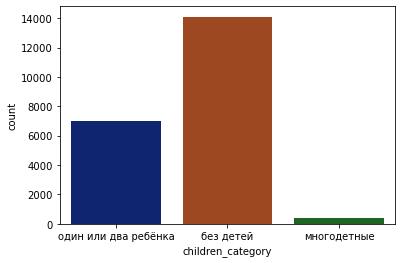

In [65]:
# визуализируем данные
sns.countplot(x = 'children_category', data = data, palette = 'dark');

In [66]:
# напишем функцию, распределим на категории плательщиков по платежеспособности и задолженностям 
# в зависимости от количества детей

def children_and_debt(row):
    children_category = row['children_category']
    debt = row['debt']
   
    # без детей
    if children_category == 'без детей':
        if debt == 1:
            return 'должник - без детей'
        
    if children_category == 'без детей':
        if debt == 0:
            return 'добросовестный - без детей'
        
    # есть дети (1-2 ребёнка)
    if children_category == 'один или два ребёнка':
        if debt == 1:
            return 'должник - один или два ребёнка'
        
    if children_category == 'один или два ребёнка':
        if debt == 0:
            return 'добросовестный - один или два ребёнка'
        
    # многодетные (более 3 детей)
    if children_category == 'многодетные':
        if debt == 1:
            return 'должник - многодетный'
        
    if children_category == 'многодетные':
        if debt == 0:
            return 'добросовестный - многодетный'
         
# добавим новый столбец
data['children_and_debt'] = data.apply(children_and_debt, axis=1)

# выведем первые 5 строк таблицы, чтобы проверить новый столбец
data.head()    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category,children_and_debt
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,один или два ребёнка,добросовестный - один или два ребёнка
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,один или два ребёнка,добросовестный - один или два ребёнка
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,без детей,добросовестный - без детей
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетные,добросовестный - многодетный
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,без детей,добросовестный - без детей


In [67]:
# найдём процент должников

# без детей
debt_without_children = (data.loc[(data['children_and_debt'] == 'должник - без детей')].count().sum() / data.loc[(data['children_category'] == 'без детей')].count().sum())
print(f'Процент должников не имеющих детей: {debt_without_children:.1%}')

# есть дети
debt_with_children = (data.loc[(data['children_and_debt'] == 'должник - один или два ребёнка')].count().sum() / data.loc[(data['children_category'] == 'один или два ребёнка')].count().sum())
print(f'Процент должников имеющих одного или двух детей: {debt_with_children:.1%}')

#многодетные
debt_with_many_children = (data.loc[(data['children_and_debt'] == 'должник - многодетный')].count().sum() / data.loc[(data['children_category'] == 'многодетные')].count().sum())
print(f'Процент многодетных должников: {debt_with_many_children:.1%}')

Процент должников не имеющих детей: 7.6%
Процент должников имеющих одного или двух детей: 9.3%
Процент многодетных должников: 8.2%


In [68]:
# найдём средний процент должников в зависимости от количества детей
debt_from_children = pd.DataFrame()
debt_from_children['debt_count'] = data.groupby('children')['debt'].count()
debt_from_children['debt_sum'] = data.groupby('children')['debt'].sum()
debt_from_children['debt_percentage'] = (debt_from_children['debt_sum'] / debt_from_children['debt_count']) * 100
debt_from_children.sort_values('debt_percentage', ascending = False)

,debt_count,debt_sum,debt_percentage
children,,,
4,41,4,9.756098
2,2128,202,9.492481
1,4855,445,9.165808
3,330,27,8.181818
0,14090,1063,7.544358
5,9,0,0.000000


**Вывод**

В представленной выборке клиенты не имеющие детей берут кредиты чаще, чем клиенты у которых есть дети. 
При этом процент должников среди данной категории клиентов ниже. Это можно объяснить тем, что в тяжёлой финансовой ситуации человек имеющий детей предпочтёт потратить деньги на семью, нежели потратить средства на выплату долга по кредиту банку.

Стоит сказать, что данные неоднородны, особенно те, что касаются 3, 4, 5 детей. В этих категориях не так много строк, чтобы можно было полноценно оценить влияет ли количество детей на возврат кредита в срок. 

Но если смотреть на те категории семей, где есть один или два ребёнка, то здесь можно сделать вывод, что доля просрочек по выплате кредитов больше, чем у тех людей, которые не имеют детей.

### Вопрос 2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [69]:
# напишем функцию, распределим на категории по платежеспособности и задолженности в зависимости от семейного положения

def family_status_debt(row):
    status = row['family_status_id']
    debt = row['debt']
   
    # в браке
    if status == 0:
        if debt == 1:
            return 'должник - в браке'
    if status == 0:
        if debt == 0:
            return 'добросовестный - в браке'
        
    # в гражданском браке
    if status == 1:
        if debt == 1:
            return 'должник - в гражданском браке'
    if status == 1:
        if debt == 0:
            return 'добросовестный - в гражданском браке'
        
    # вдовец / вдова
    if status == 2:
        if debt == 1:
            return 'должник - вдовец / вдова'
    if status == 2:
        if debt == 0:
            return 'добросовестный - вдовец / вдова'
    
    # в разводе
    if status == 3:
        if debt == 1:
            return 'должник - в разводе'
    if status == 3:
        if debt == 0:
            return 'добросовестный - в разводе'
        
    # не женат / не замужем
    if status == 4:
        if debt == 1:
            return 'должник - не женат / не замужем'
    if status == 4:
        if debt == 0:
            return 'добросовестный - не женат / не замужем'
    
    
# добавим новый столбец
data['family_status_debt'] = data.apply(family_status_debt, axis=1)

# выведем первые 5 строк таблицы, чтобы проверить новый столбец
data.head()    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category,children_and_debt,family_status_debt
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,один или два ребёнка,добросовестный - один или два ребёнка,добросовестный - в браке
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,один или два ребёнка,добросовестный - один или два ребёнка,добросовестный - в браке
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,без детей,добросовестный - без детей,добросовестный - в браке
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетные,добросовестный - многодетный,добросовестный - в браке
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,без детей,добросовестный - без детей,добросовестный - в гражданском браке


In [70]:
# подсчитаем число клиентов по категориям
data['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4150
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'женат / замужем'),
  Text(1, 0, 'гражданский брак'),
  Text(2, 0, 'не женат / не замужем'),
  Text(3, 0, 'в разводе'),
  Text(4, 0, 'вдовец / вдова')])

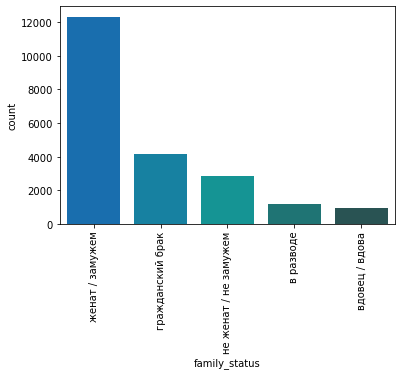

In [71]:
# визуализируем данные
sns.countplot('family_status',data=data,palette='winter_d', order = data['family_status'].value_counts().index)
plt.xticks(rotation=90)

In [72]:
# найдём процент должников

# в браке
debt_marriage = (data.loc[(data['family_status_debt'] == 'должник - в браке')].count().sum() / data.loc[(data['family_status'] == 'женат / замужем')].count().sum())
print(f'Процент должников в браке:: {debt_marriage:.1%}')

# в гражданском браке
debt_civil_marriage = (data.loc[(data['family_status_debt'] == 'должник - в гражданском браке')].count().sum() / data.loc[(data['family_status'] == 'гражданский брак')].count().sum()) 
print(f'Процент должников в гражданском браке:: {debt_civil_marriage:.1%}')

# холостые
debt_single = (data.loc[(data['family_status_debt'] == 'должник - не женат / не замужем')].count().sum() / data.loc[(data['family_status'] == 'не женат / не замужем')].count().sum())
print(f'Процент холостых должников:: {debt_single:.1%}')

# в разводе
debt_divorced = (data.loc[(data['family_status_debt'] == 'должник - в разводе')].count().sum() / data.loc[(data['family_status'] == 'в разводе')].count().sum())
print(f'Процент должников в разводе: {debt_divorced:.1%}')

# вдовец / вдова
debt_widower = (data.loc[(data['family_status_debt'] == 'должник - вдовец / вдова')].count().sum() / data.loc[(data['family_status'] == 'вдовец / вдова')].count().sum()) 
print(f'Процент вдовствующих должников: {debt_widower:.1%}')

Процент должников в браке:: 7.6%
Процент должников в гражданском браке:: 9.3%
Процент холостых должников:: 9.8%
Процент должников в разводе: 7.1%
Процент вдовствующих должников: 6.6%


In [73]:
# найдём средний процент должников в зависимости от количества детей
debt_family_status = pd.DataFrame()
debt_family_status['family_status_sum'] = data.groupby('family_status')['debt'].sum()
debt_family_status['family_status_count'] = data.groupby('family_status')['debt'].count()
debt_family_status['family_status_percentage'] = (debt_family_status['family_status_sum'] / debt_family_status['family_status_count']) * 100 
debt_family_status.sort_values('family_status_percentage', ascending = False)

,family_status_sum,family_status_count,family_status_percentage
family_status,,,
не женат / не замужем,274,2810,9.750890
гражданский брак,388,4150,9.349398
женат / замужем,931,12339,7.545182
в разводе,85,1195,7.112971
вдовец / вдова,63,959,6.569343


#### Вывод

По результатам исследования данной выборки можно сделать вывод, что семейный статус влияет на то - платит ли клиент по кредиту в срок или нет. Например, люди, официально состоящие в браке, вдовствующие или в разводе реже позволяют себе отнестись безответственно и просрочить выплату кредита. Можно предположить, что это связано с тем, что они имеют опыт совместного быта, опыт использования общего бюджета с другим человеком, да и чтобы взять кредит, то уже нужно спросить мнение другого человек. Как правило, у этой категории людей ещё есть дети и тоже отвественно подходят к таким вещам. Интересно, что люди, которые имели более негативный опыт в жизни подходят к выплате долга более ответственно, чем те, кто не был в браке или находится в браке.

Больше всего задолжностей по кредиту имеют холостые люди, либо те, кто состоит в гражданском браке. 

Меньше ответственности в жизни - меньше ответственности к выплате кредитов вовремя. :)

### Вопрос 3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Ранее уже была проведена категоризация клиентов банка по уровню дохода.

In [74]:
# напишем функцию, разобьём на категории по платежеспособности и задолженности в зависимости от уровня дохода

def income_category_debt(row):
    income = row['total_income_category']
    debt = row['debt']
   
    # категория дохода A
    if income == 'А':
        if debt == 1:
            return 'должник - категория А'
    if income == 'A':
        if debt == 0:
            return 'добросовестный - категория А'
        
    # категория дохода B
    if income == 'B':
        if debt == 1:
            return 'должник - категория B'
    if income == 'B':
        if debt == 0:
            return 'добросовестный - категория B'
        
    # категория дохода C
    if income == 'C':
        if debt == 1:
            return 'должник - категория C'
    if income == 'C':
        if debt == 0:
            return 'добросовестный - категория C'
     
    # категория дохода D
    if income == 'D':
        if debt == 1:
            return 'должник - категория D'
    if income == 'D':
        if debt == 0:
            return 'добросовестный - категория D'
    
    # категория дохода E
    if income == 'E':
        if debt == 1:
            return 'должник - категория E'
    if income == 'E':
        if debt == 0:
            return 'добросовестный - категория E'

# добавим новый столбец
data['income_category_debt'] = data.apply(income_category_debt, axis=1)

# выведем первые 5 строк таблицы, чтобы проверить новый столбец
data.head()    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category,children_and_debt,family_status_debt,income_category_debt
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,один или два ребёнка,добросовестный - один или два ребёнка,добросовестный - в браке,добросовестный - категория B
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,один или два ребёнка,добросовестный - один или два ребёнка,добросовестный - в браке,добросовестный - категория C
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,без детей,добросовестный - без детей,добросовестный - в браке,добросовестный - категория C
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетные,добросовестный - многодетный,добросовестный - в браке,добросовестный - категория B
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,без детей,добросовестный - без детей,добросовестный - в гражданском браке,добросовестный - категория C


In [75]:
# подсчитаем количество клиентов в каждой категории дохода 
data['total_income_category'].value_counts()

C    16016
B     5040
D      350
A       25
E       22
Name: total_income_category, dtype: int64

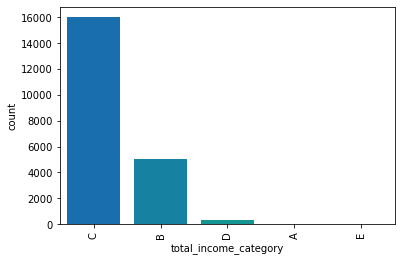

In [76]:
# визуализируем данные
sns.countplot('total_income_category',data=data,palette='winter_d', order = data['total_income_category'].value_counts().index)
plt.xticks(rotation=90);

In [77]:
# категория дохода A
category_A = (data.loc[(data['income_category_debt'] == 'должник - категория A')].count().sum() / data.loc[(data['total_income_category'] == 'A')].count().sum()) 
print(f'Процент должников в категории дохода A: {category_A:.1%}')

# категория дохода B
category_B = (data.loc[(data['income_category_debt'] == 'должник - категория B')].count().sum() / data.loc[(data['total_income_category'] == 'B')].count().sum()) 
print(f'Процент должников в категории дохода В: {category_B:.1%}')

# категория дохода C
category_C = (data.loc[(data['income_category_debt'] == 'должник - категория C')].count().sum() / data.loc[(data['total_income_category'] == 'C')].count().sum()) 
print(f'Процент должников в категории дохода С: {category_C:.1%}')

# категория дохода D
category_D = (data.loc[(data['income_category_debt'] == 'должник - категория D')].count().sum() / data.loc[(data['total_income_category'] == 'D')].count().sum()) 
print(f'Процент должников в категории дохода D: {category_D:.1%}')

# категория дохода E
category_E = (data.loc[(data['income_category_debt'] == 'должник - категория E')].count().sum() / data.loc[(data['total_income_category'] == 'E')].count().sum()) 
print(f'Процент должников в категории дохода E: {category_E:.1%}')

Процент должников в категории дохода A: 0.0%
Процент должников в категории дохода В: 7.1%
Процент должников в категории дохода С: 8.5%
Процент должников в категории дохода D: 6.0%
Процент должников в категории дохода E: 8.8%


In [78]:
# найдём средний процент должников в зависимости от категории дохода
income_category_debt = pd.DataFrame()
income_category_debt['total_income_category_sum'] = data.groupby('total_income_category')['debt'].sum()
income_category_debt['total_income_category_count'] = data.groupby('total_income_category')['debt'].count()
income_category_debt['total_income_category_percentage'] = (income_category_debt['total_income_category_sum'] / income_category_debt['total_income_category_count']) * 100 
income_category_debt.sort_values('total_income_category_percentage', ascending = False)

,total_income_category_sum,total_income_category_count,total_income_category_percentage
total_income_category,,,
E,2,22,9.090909
C,1360,16016,8.491508
A,2,25,8.000000
B,356,5040,7.063492
D,21,350,6.000000


#### Вывод

В данной выборке больше всего кредиты берут люди с категорией дохода С. Месячный заработок от 50 001 до 200 000 рублей. 

Зависимость трудно определить, потому что очень много значений попадает именно в  эту категорию. Можно лишь сказать, что просрочка по этим кредитам выше у людей с другими категориями дохода. Более бедные с категорией дохода E стараются жить по средствам, не делать новых долгов. Более богатые имеют больше возможностей выплачивать кредит в срок.

Богатые люди с категорией дохода А всегда возвращают кредит вовремя.

### Вопрос 4. Как разные цели кредита влияют на его возврат в срок?

In [79]:
# напишем функцию, которая разбивает на категории по платежеспособности и задолженности в зависимости от уровня дохода

def purpose_category_debt(row):
    purpose = row['purpose_category']
    debt = row['debt']
   
    # автомобиль
    if purpose == 'операции с автомобилем':
        if debt == 1:
            return 'должник - операции с автомобилем'
    if purpose == 'операции с автомобилем':
        if debt == 0:
            return 'добросовестный - операции с автомобилем'
        
    # недвижимость
    if purpose == 'операции с недвижимостью':
        if debt == 1:
            return 'должник - операции с недвижимостью'
    if purpose == 'операции с недвижимостью':
        if debt == 0:
            return 'добросовестный - операции с автомобилем'
        
    # свадьба
    if purpose == 'проведение свадьбы':
        if debt == 1:
            return 'должник - проведение свадьбы'
    if purpose == 'проведение свадьбы':
        if debt == 0:
            return 'добросовестный - проведение свадьбы'
        
    # образование
    if purpose == 'получение образования':
        if debt == 1:
            return 'должник - получение образования'
    if purpose == 'получение образования':
        if debt == 0:
            return 'добросовестный - получение образования'
        
# добавим новый столбец
data['purpose_category_debt'] = data.apply(purpose_category_debt, axis=1)

# выведем первые 5 строк таблицы, чтобы проверить новый столбец
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category,children_and_debt,family_status_debt,income_category_debt,purpose_category_debt
0,1,351,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,один или два ребёнка,добросовестный - один или два ребёнка,добросовестный - в браке,добросовестный - категория B,добросовестный - операции с автомобилем
1,1,167,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,один или два ребёнка,добросовестный - один или два ребёнка,добросовестный - в браке,добросовестный - категория C,добросовестный - операции с автомобилем
2,0,234,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,без детей,добросовестный - без детей,добросовестный - в браке,добросовестный - категория C,добросовестный - операции с автомобилем
3,3,171,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетные,добросовестный - многодетный,добросовестный - в браке,добросовестный - категория B,добросовестный - получение образования
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,без детей,добросовестный - без детей,добросовестный - в гражданском браке,добросовестный - категория C,добросовестный - проведение свадьбы


In [80]:
# подсчитаем количество заявок по каждой категории
data['purpose_category'].value_counts()

операции с недвижимостью    4460
операции с автомобилем      4306
получение образования       4013
проведение свадьбы          2324
Name: purpose_category, dtype: int64

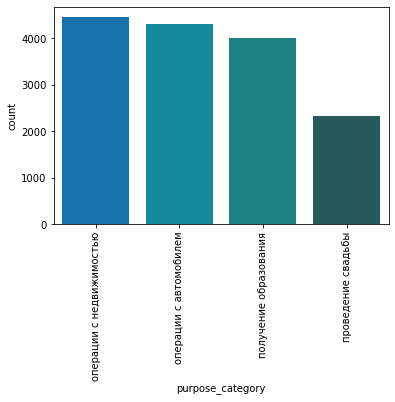

In [81]:
# визуализируем данные
sns.countplot('purpose_category',data=data,palette='winter_d', order = data['purpose_category'].value_counts().index)
plt.xticks(rotation=90);

In [82]:
# найдём процент должников

# автомобиль
car_debt = (data.loc[(data['purpose_category_debt'] == 'должник - операции с автомобилем')].count().sum() / data.loc[(data['purpose_category'] == 'операции с автомобилем')].count().sum()) 
print(f'Процент должников в операциях с автомобилями: {car_debt:.1%}')

# недвижимость
realty_debt = (data.loc[(data['purpose_category_debt'] == 'должник - операции с недвижимостью')].count().sum() / data.loc[(data['purpose_category'] == 'операции с недвижимостью')].count().sum()) 
print(f'Процент должников в операциях с недвижимостью: {realty_debt:.1%}')

# свадьба
wedding_debt = (data.loc[(data['purpose_category_debt'] == 'должник - проведение свадьбы')].count().sum() / data.loc[(data['purpose_category'] == 'проведение свадьбы')].count().sum()) 
print(f'Процент должников за проведение свадьбы: {wedding_debt:.1%}')

# образование
education_debt = (data.loc[(data['purpose_category_debt'] == 'должник - получение образования')].count().sum() / data.loc[(data['purpose_category'] == 'получение образования')].count().sum()) 
print(f'Процент должников за получение образования: {education_debt:.1%}')

Процент должников в операциях с автомобилями: 9.4%
Процент должников в операциях с недвижимостью: 6.9%
Процент должников за проведение свадьбы: 8.0%
Процент должников за получение образования: 9.2%


In [83]:
# найдём средний процент должников в зависимости от цели кредита
purpose_category_debt = pd.DataFrame()
purpose_category_debt['purpose_category_sum'] = data.groupby('purpose_category')['debt'].sum()
purpose_category_debt['purpose_category_count'] = data.groupby('purpose_category')['debt'].count()
purpose_category_debt['purpose_category_percentage'] = (purpose_category_debt['purpose_category_sum'] / purpose_category_debt['purpose_category_count']) * 100 
purpose_category_debt.sort_values('purpose_category_percentage', ascending = False)

,purpose_category_sum,purpose_category_count,purpose_category_percentage
purpose_category,,,
операции с автомобилем,403,4306,9.359034
получение образования,370,4013,9.220035
проведение свадьбы,186,2324,8.003442
операции с недвижимостью,308,4460,6.905830


#### Вывод

По результатам исследования данной выборки мы видим, что чаще всего люди берут кредиты на недвижимость. Улучшение жилищных условий очень актуальная тема для всех слоёв населения. Банки строго регулируют кому выдавать кредит, иногда даже применяют возможности искусственного интеллекта для составления портрета клиента и рисков работы с ним. В связи с чем, просрочка по ипотечному кредита самая низкая из представленных категорий. Реже всего берут кредиты на свадьбы, выплаты по кредитам взятых на эту цель совершают довольно исправно.

Больше всего просроченных кредитов приходится на операции с автомобилями и на получение образования. Можно предположить, что без автомобиля сейчас никуда, с его приобретением появляется больше расходов, включая амортизацию самого транспортного средства.
Люди получают образования для повышения уровня своего дохода и своей жизни, поэтому временно могут испытывать финансовые трудности во время обучения.

## Общий вывод

В общем поставленная задача выполнена. В ходе процесса мы провели обзор и предобработку данных. Поменяли в трёх столбцах типы - для лучшей наглядности и более быстрой обработки. Удалили дубликаты, ошибки в регистре написания, применяли лемматизацию и категоризации по количеству детей, уровню дохода и цели получения кредита. После подготовки данных, сделали сводные таблицы, использовали функцию и графики для ответа на все 4 поставленных вопроса. 

Были выявлены следующие закономерности в просрочках по кредитам:

* _Наличие детей_ - по результатам исследования является скорее минусом, так как в случае возникновения финансовых проблем клиент предпочтёт потратить средства на нужды своей семьи.
* _Семейное положение_ - клиенты, состоящие в официальном браке или состоявшие в нем раньше более ответственные. Холостые и люди, живущие в гражданском браке чаще имеют задолженности по кредитам.
* _Уровень достатка_ - клиенты с доходом от 50 001 до 200 000 рублей в месяц чаще остальных берут кредиты, однако выплачивают их не очень исправно. Клиенты с низким уровнем дохода имеют меньше просрочек по выплатам. 
* _Цель кредита_ - больше всего пользуется спросом кредит для операций с недвижимостью. По этой цели так же и меньше всего просрочек с выплатами. Можно предположить, что вопрос улучшения желищных условий действительно важен для людей. К тому же банки тщательнее контролируют выдачу таких кредитов: тщательнее проверяет клиентов, страхует жизнь заёмщиков, если что, то недвижимость может учти с аукциона и банк не потеряет деньги. 

По результатам изучения предоставленных банком данных можно сделать вывод, что все изученные факторы являются важными в оценке рисков и принятии решений при выдаче кредита. 

Можно утвержать, что чаще всего кредитные услугами пользуются люди со средним достатком с целью проведения операций с недвижимостью, покупки автомобиля или получения образования, не состоящие в официальном браке и не имеющие детей. Самыми надежными клиентами являются люди состоящие в официальном браке (ныне или ранее), без детей, с низким или чуть выше среднего уровнем достатка и целью получения кредита на недвижимость. Следует быть аккуратнее с холостыми, либо состоящими в гражданском браке людьми, со средним уровнем дохода, с детьми и берущие кредит с целью покупки автомобиля или получения образования.

